# Importing necessary libraries

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

# Read the data from CSV file into a DataFrame

In [219]:
df = pd.read_csv('mail_data.csv')

# Display the DataFrame

In [220]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Replace missing values with empty strings

In [221]:
data = df.where((pd.notnull(df)), '')

# Convert text to lowercase

In [222]:
data['Message'] = data['Message'].str.lower()

# Remove punctuation

In [223]:
data['Message'] = data['Message'].str.replace('[^\w\s]', '')

# Display the first few rows of the data

In [224]:
data.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


# Display information about the data

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Get the shape of the data (number of rows and columns)

In [226]:
data.shape

(5572, 2)

# Remove stop words using NLTK

In [227]:
stop_words = set(stopwords.words('english'))
data['Message'] = data['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Replace 'spam' with 0 and 'ham' with 1 in the 'Category' column

In [228]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

# Separate features (X) and target variable (Y)

In [229]:
X = data['Message']

Y = data['Category']

# Display features (X) and target variable (Y)

In [230]:
print(X)

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                 nah think goes usf, lives around though
                              ...                        
5567    2nd time tried 2 contact u. u £750 pound prize...
5568                         ü b going esplanade fr home?
5569             pity, * mood that. so...any suggestions?
5570    guy bitching acted like i'd interested buying ...
5571                                      rofl. true name
Name: Message, Length: 5572, dtype: object


In [231]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Split the data into training and testing sets

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Print shapes of training and testing sets

In [233]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [234]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


# Initialize TfidfVectorizer to convert text data into numerical features

In [235]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

# Convert text data into numerical features for training and testing sets

In [236]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert target variables to integers

In [237]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Display the converted features

In [238]:
print(X_train)

3075                            know. did't msg recently.
1787    know god created gap fingers..? that, one made...
1614                             thnx dude. u guys 2nite?
4304                                      yup i'm free...
3266    44 7732584351, want new nokia 3510i colour pho...
                              ...                        
789     5 free top polyphonic tones call 087018728737,...
968     u want come back?.a beautiful necklace token h...
1667      guess spent last night phasing fourth dimension
3321    eh sorry leh... din c ur msg. sad already lar....
1688    free top ringtone -sub weekly ringtone-get 1st...
Name: Message, Length: 4457, dtype: object


In [239]:
print(X_train_features)

  (0, 5409)	0.6155751058780515
  (0, 4452)	0.4140071938096566
  (0, 2223)	0.5747631497304433
  (0, 3808)	0.3454166385816108
  (1, 4077)	0.18880584110891163
  (1, 3184)	0.29694482957694585
  (1, 3322)	0.31610586766078863
  (1, 2956)	0.3398297002864083
  (1, 2745)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1838)	0.2784903590561455
  (1, 2757)	0.3226407885943799
  (1, 2955)	0.33036995955537024
  (1, 1990)	0.33036995955537024
  (1, 3045)	0.2503712792613518
  (1, 3808)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3155)	0.4107239318312698
  (2, 2403)	0.45287711070606745
  (2, 6596)	0.6056811524587518
  (3, 2869)	0.5864269879324768
  (3, 7407)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5493)	0.15743785051118356
  (4, 1558)	0.2398447378557748
  :	:
  (4454, 4598)	0.2669765732445391
  (4454, 3141)	0.32014451677763156
  (4455, 2246)	0.37052851863170466
  (4455, 2468)	0.35441545511837946
  (4455, 5642)	0.33545678464631296
  (4455, 6805)	0.29731757715898277
  (44

# Initialize Logistic Regression model

In [240]:
model = LogisticRegression()

# Train the model using the training data

In [241]:
model.fit(X_train_features, Y_train)

LogisticRegression()

# Predictions on the training data

In [242]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Print accuracy on training data

In [243]:
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9667938074938299


# Predictions on the test data

In [244]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy on test data

In [245]:
print('Accuracy on test data : ',  accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


# Print classification report

In [246]:
print(classification_report(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# Plot confusion matrix

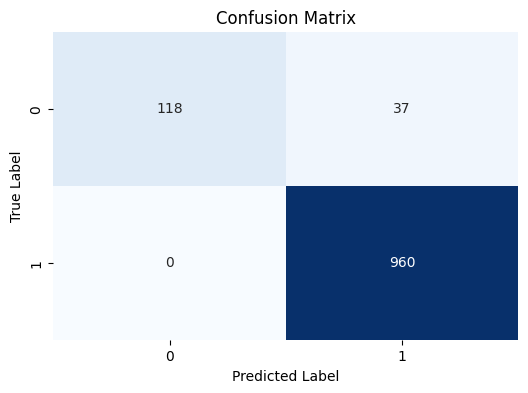

In [247]:
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Example ham and spam emails

In [248]:
ham_mail = ['Pedro, did you know PayPal gives you access to cash back1 like you wouldn’t believe? Let’s get you started on earning some of it.']

spam_mail = ['U have a chance to win the $%%^%$% prize! Click the link below and u will be redirected to you prize in a blink!']

# Convert ham and spam emails into numerical features

In [249]:
ham_features = feature_extraction.transform(ham_mail)

spam_features = feature_extraction.transform(spam_mail)

# Predictions on example ham and spam emails

In [250]:
prediction1 = model.predict(ham_features)

prediction2 = model.predict(spam_features)

# Print predictions

In [251]:
if(prediction1[0] == 1):
    print('Prediction 1: Ham mail')
else:
    print('Prediction 1: Spam mail')

if(prediction2[0] == 1):
    print('Prediction 2: Ham mail')
else:
    print('Prediction 2: Spam mail')

Prediction 1: Ham mail
Prediction 2: Spam mail
